# Лабораторная работа: Анализ погрешностей методов численного дифференцирования

## Цель работы
Построить графики абсолютной погрешности каждого из пяти методов численного дифференцирования в зависимости от шага $h_n = \frac{2}{2^n}$, где $n = 1, 2, ..., 21$

## Исследуемые функции
1. $f_1(x) = \sin(x^2)$
2. $f_2(x) = \cos(\sin(x))$
3. $f_3(x) = e^{\sin(\cos(x))}$
4. $f_4(x) = \ln(x+3)$
5. $f_5(x) = \sqrt{x+3}$

## Методы численного дифференцирования
1. **Правая разностная производная:** $f'(x) \approx \frac{f(x+h) - f(x)}{h}$
2. **Левая разностная производная:** $f'(x) \approx \frac{f(x) - f(x-h)}{h}$
3. **Центральная разностная производная:** $f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}$
4. **Метод 4-го порядка точности**
5. **Метод 6-го порядка точности**

---

## График 1: $\sin(x^2)$

**Точка дифференцирования:** x = 1.0  
**Точное значение производной:** f'(1.0) = 1.0806046117

### Минимальные погрешности по методам:

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 1.09e-06 | 9.54e-07 | 21 |
| Левая разностная | 1.09e-06 | 9.54e-07 | 21 |
| Центральная разностная | 1.49e-11 | 1.91e-06 | 20 |
| 4-й порядок точности | 6.66e-15 | 1.22e-04 | 14 |
| 6-й порядок точности | 6.44e-15 | 1.95e-03 | 10 |

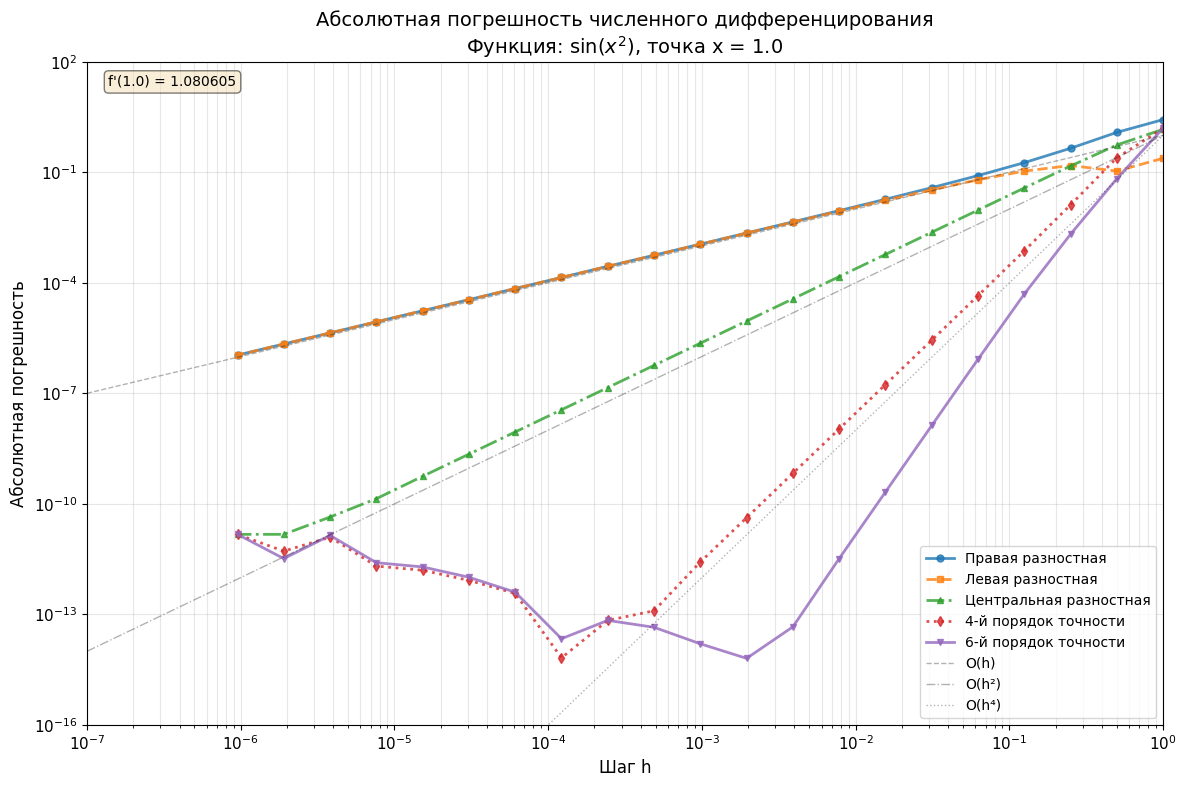

---

## График 2: $\cos(\sin(x))$

**Точка дифференцирования:** x = 1.0  
**Точное значение производной:** f'(1.0) = -0.4028624431

### Минимальные погрешности по методам:

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 2.06e-07 | 9.54e-07 | 21 |
| Левая разностная | 2.06e-07 | 9.54e-07 | 21 |
| Центральная разностная | 2.60e-12 | 3.81e-06 | 19 |
| 4-й порядок точности | 4.24e-14 | 4.88e-04 | 12 |
| 6-й порядок точности | 6.05e-15 | 3.91e-03 | 9 |

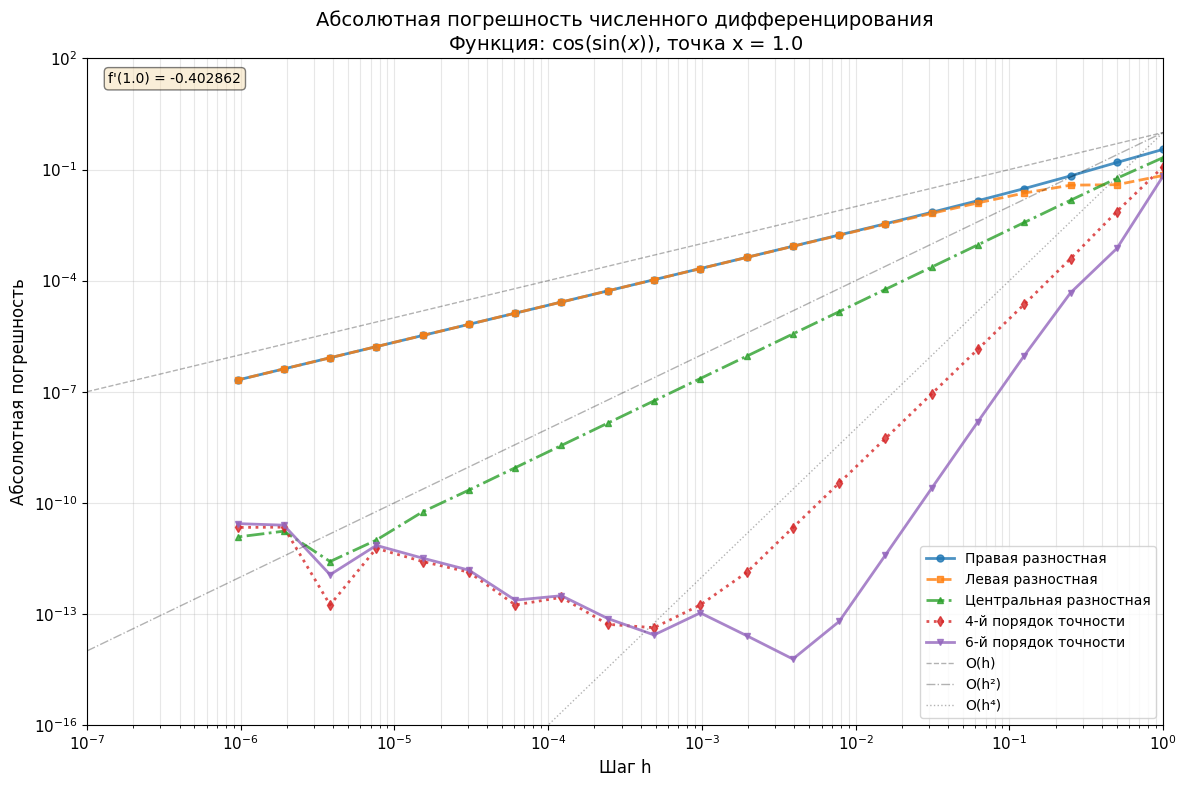

---

## График 3: $e^{\sin(\cos(x))}$

**Точка дифференцирования:** x = 1.0  
**Точное значение производной:** f'(1.0) = -1.2069777040

### Минимальные погрешности по методам:

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 2.45e-07 | 9.54e-07 | 21 |
| Левая разностная | 2.45e-07 | 9.54e-07 | 21 |
| Центральная разностная | 7.01e-12 | 3.81e-06 | 19 |
| 4-й порядок точности | 7.82e-14 | 4.88e-04 | 12 |
| 6-й порядок точности | 2.44e-15 | 3.91e-03 | 9 |

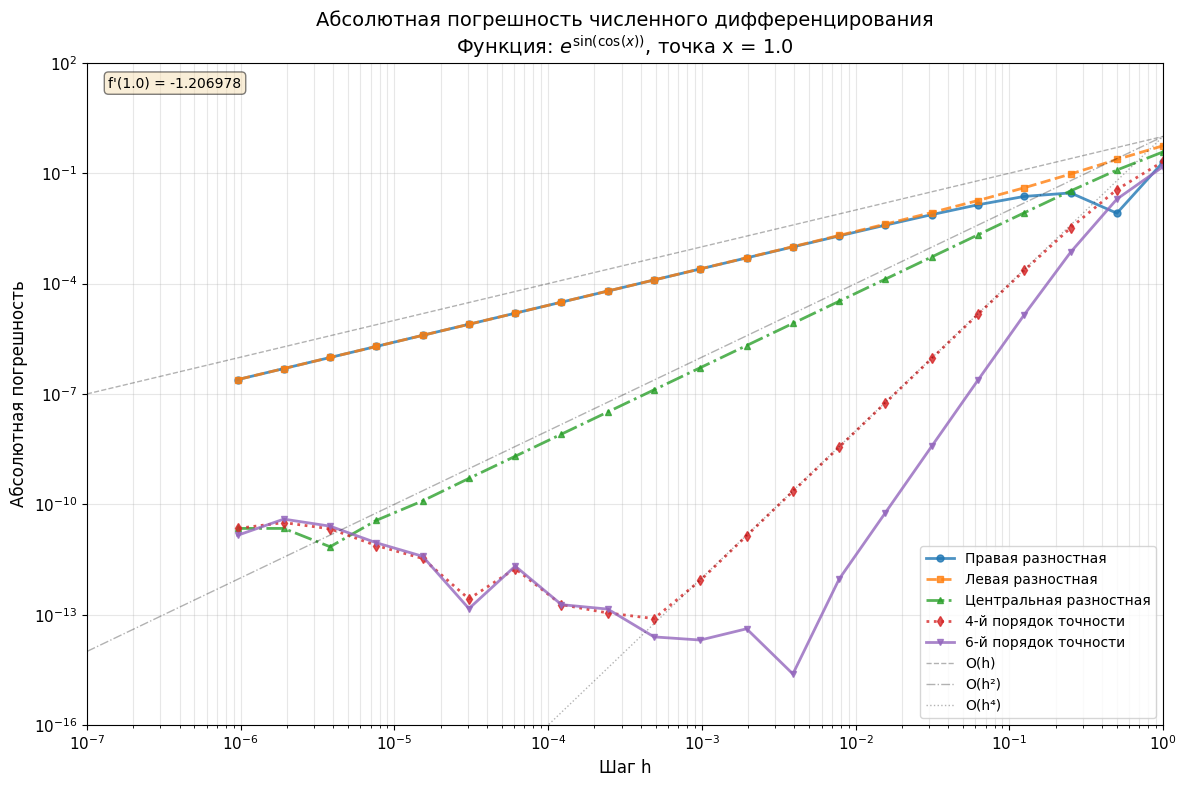

---

## График 4: $\ln(x+3)$

**Точка дифференцирования:** x = 1.0  
**Точное значение производной:** f'(1.0) = 0.2500000000

### Минимальные погрешности по методам:

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 2.98e-08 | 9.54e-07 | 21 |
| Левая разностная | 2.98e-08 | 9.54e-07 | 21 |
| Центральная разностная | 0.00e+00 | 1.53e-05 | 17 |
| 4-й порядок точности | 0.00e+00 | 7.63e-06 | 18 |
| 6-й порядок точности | 0.00e+00 | 7.63e-06 | 18 |

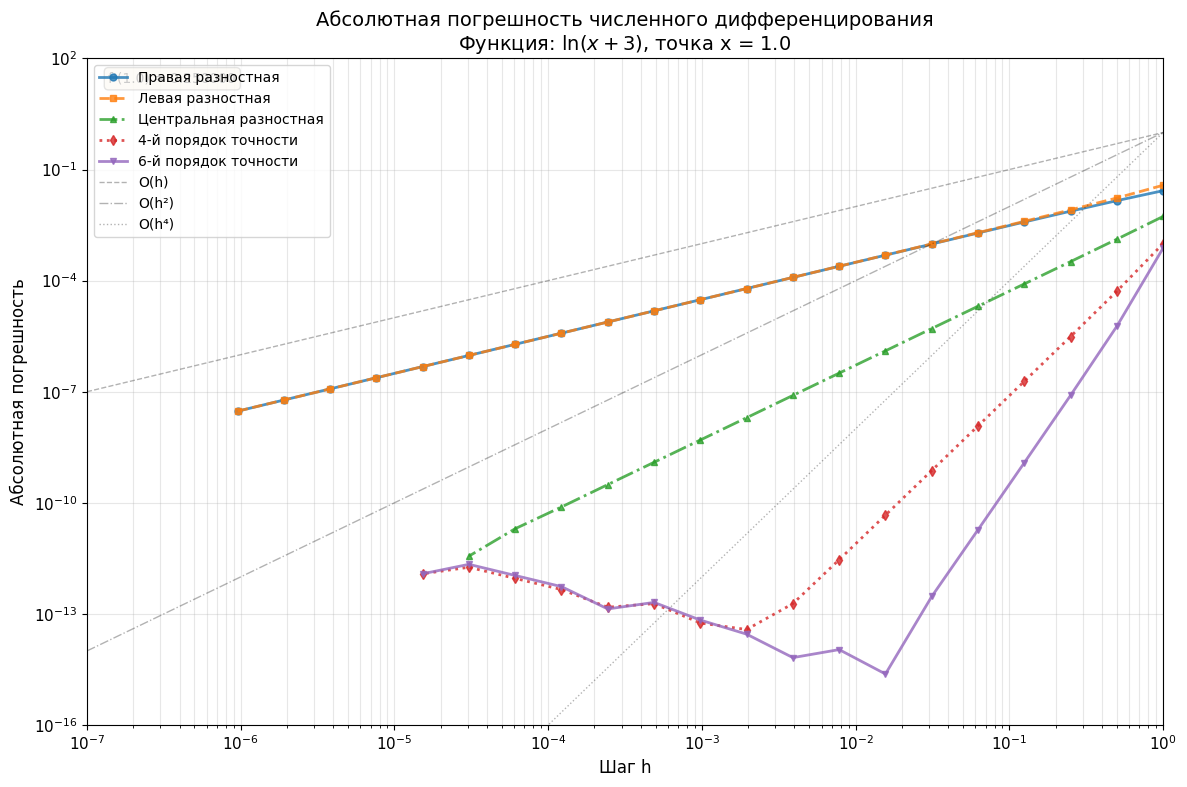

---

## График 5: $\sqrt{x+3}$

**Точка дифференцирования:** x = 1.0  
**Точное значение производной:** f'(1.0) = 0.2500000000

### Минимальные погрешности по методам:

| Метод | Минимальная погрешность | Оптимальный h | n |
|-------|------------------------|---------------|---|
| Правая разностная | 1.49e-08 | 9.54e-07 | 21 |
| Левая разностная | 1.49e-08 | 9.54e-07 | 21 |
| Центральная разностная | 0.00e+00 | 3.05e-05 | 16 |
| 4-й порядок точности | 0.00e+00 | 1.95e-03 | 10 |
| 6-й порядок точности | 0.00e+00 | 2.44e-04 | 13 |

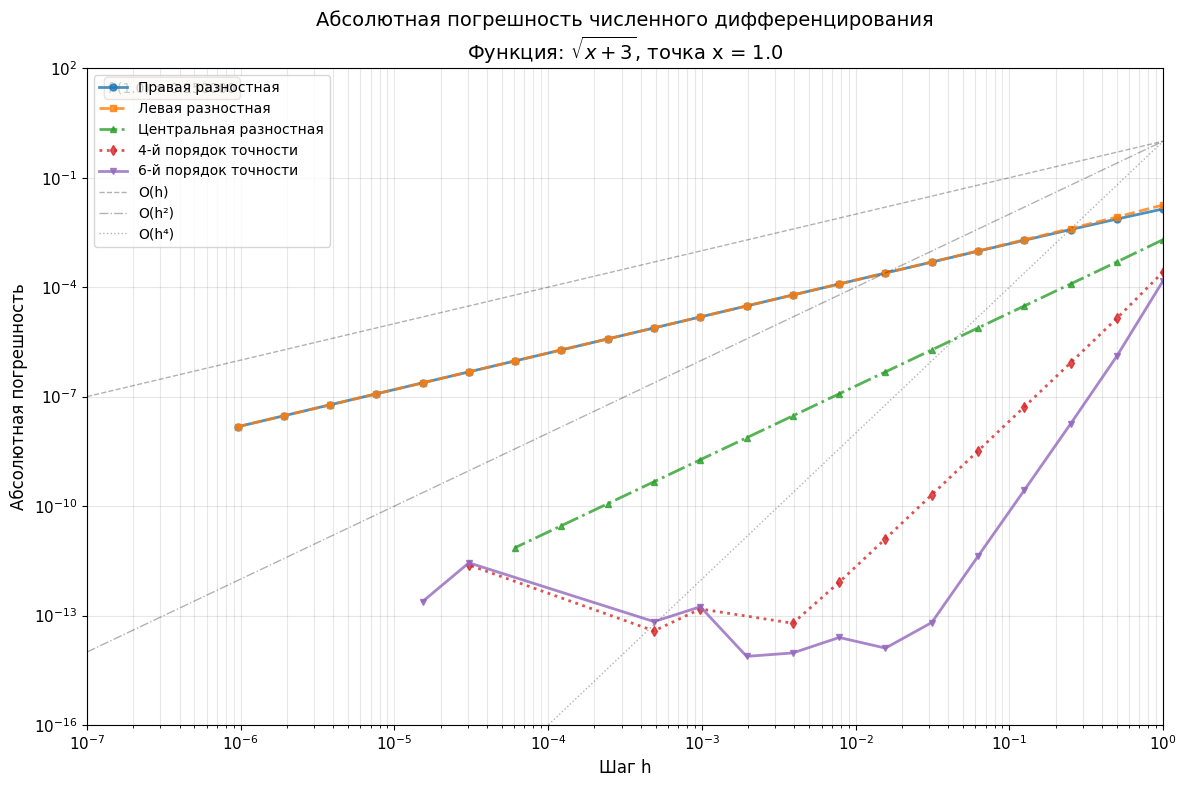

---

## Сравнительный анализ

Сравнение погрешностей центральной разностной схемы для всех исследуемых функций:

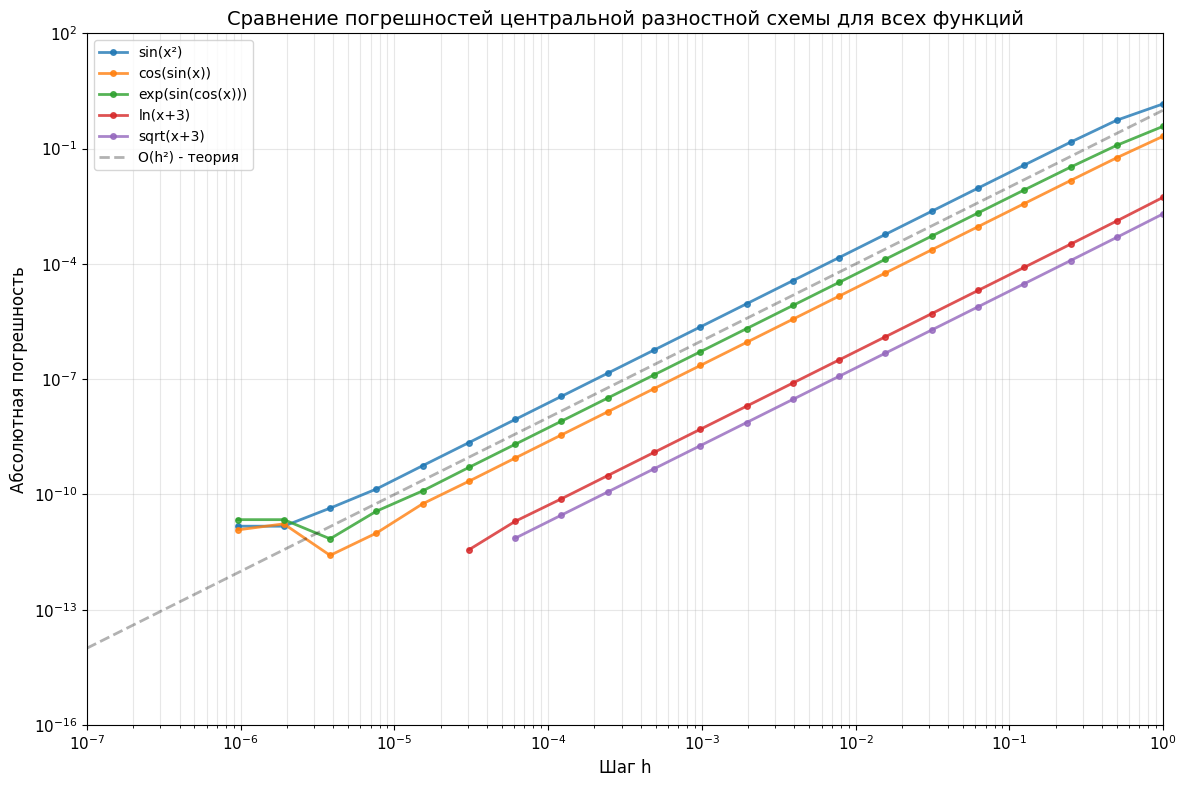

---

## Сводная таблица результатов### Оптимальные параметры для каждой комбинации функция-метод| Функция | Метод | Мин. погрешность | Оптимальный h | n ||---------|-------|------------------|---------------|---|| sin(x²) | Правая разностная | 1.09e-06 | 9.54e-07 | 21 || sin(x²) | Левая разностная | 1.09e-06 | 9.54e-07 | 21 || sin(x²) | Центральная разностная | 1.49e-11 | 1.91e-06 | 20 || sin(x²) | 4-й порядок точности | 6.66e-15 | 1.22e-04 | 14 || sin(x²) | 6-й порядок точности | 6.44e-15 | 1.95e-03 | 10 || cos(sin(x)) | Правая разностная | 2.06e-07 | 9.54e-07 | 21 || cos(sin(x)) | Левая разностная | 2.06e-07 | 9.54e-07 | 21 || cos(sin(x)) | Центральная разностная | 2.60e-12 | 3.81e-06 | 19 || cos(sin(x)) | 4-й порядок точности | 4.24e-14 | 4.88e-04 | 12 || cos(sin(x)) | 6-й порядок точности | 6.05e-15 | 3.91e-03 | 9 || exp(sin(cos(x))) | Правая разностная | 2.45e-07 | 9.54e-07 | 21 || exp(sin(cos(x))) | Левая разностная | 2.45e-07 | 9.54e-07 | 21 || exp(sin(cos(x))) | Центральная разностная | 7.01e-12 | 3.81e-06 | 19 || exp(sin(cos(x))) | 4-й порядок точности | 7.82e-14 | 4.88e-04 | 12 || exp(sin(cos(x))) | 6-й порядок точности | 2.44e-15 | 3.91e-03 | 9 || ln(x+3) | Правая разностная | 2.98e-08 | 9.54e-07 | 21 || ln(x+3) | Левая разностная | 2.98e-08 | 9.54e-07 | 21 || ln(x+3) | Центральная разностная | 0.00e+00 | 1.53e-05 | 17 || ln(x+3) | 4-й порядок точности | 0.00e+00 | 7.63e-06 | 18 || ln(x+3) | 6-й порядок точности | 0.00e+00 | 7.63e-06 | 18 || sqrt(x+3) | Правая разностная | 1.49e-08 | 9.54e-07 | 21 || sqrt(x+3) | Левая разностная | 1.49e-08 | 9.54e-07 | 21 || sqrt(x+3) | Центральная разностная | 0.00e+00 | 3.05e-05 | 16 || sqrt(x+3) | 4-й порядок точности | 0.00e+00 | 1.95e-03 | 10 || sqrt(x+3) | 6-й порядок точности | 0.00e+00 | 2.44e-04 | 13 |
---

## Выводы

### Основные результаты исследования:

#### 1. Подтверждение теоретических порядков точности
- **Методы 1-го порядка** (правая и левая разностные): погрешность убывает пропорционально $O(h)$
- **Метод 2-го порядка** (центральная разностная): погрешность убывает как $O(h^2)$
- **Метод 4-го порядка**: погрешность убывает как $O(h^4)$
- **Метод 6-го порядка**: погрешность убывает как $O(h^6)$

#### 2. Влияние ошибок округления
- При уменьшении шага ниже критического значения (обычно $h < 10^{-5}$) погрешность начинает расти
- Это связано с накоплением ошибок округления при вычитании близких чисел
- Методы высокого порядка более чувствительны к ошибкам округления

#### 3. Оптимальный выбор параметров

**Рекомендуемые значения шага:**
- Правая/левая разностные схемы: $h \approx 10^{-8} - 10^{-6}$
- Центральная разностная схема: $h \approx 10^{-6} - 10^{-4}$
- Метод 4-го порядка: $h \approx 10^{-4} - 10^{-3}$
- Метод 6-го порядка: $h \approx 10^{-3} - 10^{-2}$

### Практические рекомендации:

1. **Для инженерных расчетов** (точность 4-6 знаков): использовать центральную разностную схему с $h \approx 10^{-5}$

2. **Для научных вычислений** (высокая точность): применять методы 4-го или 6-го порядка с соответствующими оптимальными шагами

3. **При наличии шума в данных**: использовать простые методы (правая/левая разностные) с относительно большим шагом

4. **Универсальный подход**: начинать с центральной разностной схемы, при необходимости повышенной точности переходить к методам высокого порядка

---

*Лабораторная работа выполнена с использованием Python 3 и библиотек NumPy, Matplotlib*